<a href="https://colab.research.google.com/github/louispaulet/randomForestClassifierVisualizationProject/blob/main/Cancer2RandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
# import matplotlib
# matplotlib.use('TkAgg')

%matplotlib inline

%matplotlib --list

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'inline', 'ipympl', 'widget']


In [ ]:
# know attributes from :
# https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/

	# a) radius (mean of distances from center to points on the perimeter)
	# b) texture (standard deviation of gray-scale values)
	# c) perimeter
	# d) area
	# e) smoothness (local variation in radius lengths)
	# f) compactness (perimeter^2 / area - 1.0)
	# g) concavity (severity of concave portions of the contour)
	# h) concave points (number of concave portions of the contour)
	# i) symmetry 
	# j) fractal dimension ("coastline approximation" - 1)

#unknown attributes are derived from know one above (like mean, median, etc...)
#they are named der1...N (for derivative)
cols = [
        "id",
        "diagnosis",
        "radius",
        "texture",
        "perimeter",
        "area",
        "smoothness",
        "compactness",
        "concavity",
        "concave",
        "symmetry",
        "fractal-dimension",
        "der1",
        "der2",
        "der3",
        "der4",
        "der5",
        "der6",
        "der7",
        "der8",
        "der9",
        "der10",
        "der11",
        "der12",
        "der13",
        "der14",
        "der15",
        "der16",
        "der17",
        "der18",
        "der19",
        "der20"
]



breast_cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',
                        sep=',', names=cols, header=None, encoding='latin-1')

breast_cancer

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave,symmetry,fractal-dimension,der1,der2,der3,der4,der5,der6,der7,der8,der9,der10,der11,der12,der13,der14,der15,der16,der17,der18,der19,der20
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#we can drop the column id as it is metadata
breast_cancer.drop('id', inplace=True, axis=1)

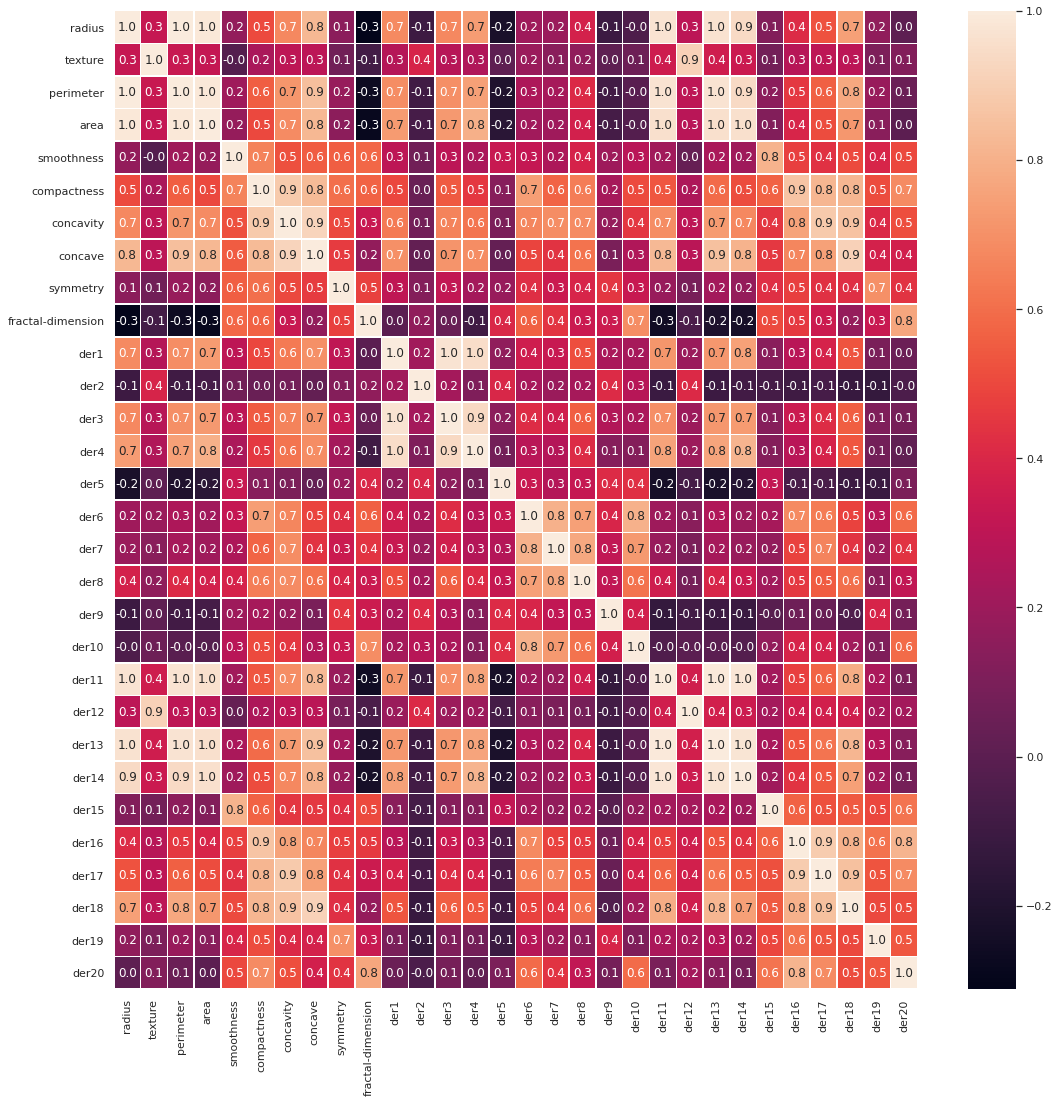

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
ax = sns.heatmap(breast_cancer.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
ax

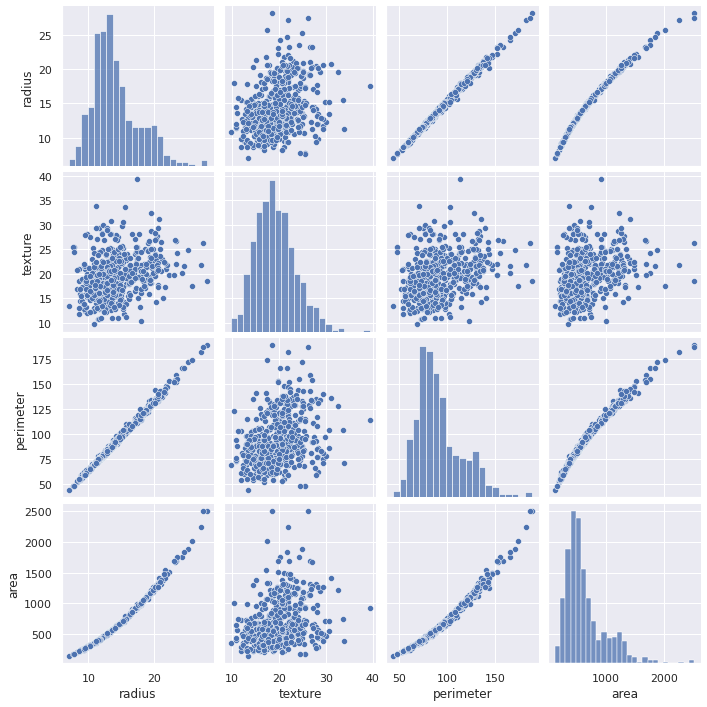

In [ ]:
#we take a look at some correlations between attributes
sns.pairplot(x.loc[:, :'area'])

In [ ]:
#we want to separate the data into the prediction class and the atributes
#here we are trying to predict class "no-recurrence-event" vs "recurrence-events"

x = breast_cancer.loc[:, 'radius':]
y = breast_cancer.loc[:, :"diagnosis"]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


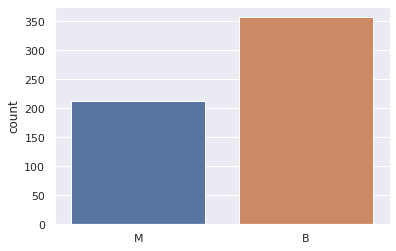

In [ ]:
#we take a look at the class representation balance
ax = sns.countplot(list(y['diagnosis']),label="Count")

In [ ]:
#split the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
#fit the RandomForestClassifier on the training dataset
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# clf = RandomForestClassifier(max_depth=6) #uncomment for regular visualization
clf.fit(xTrain, yTrain)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#gather all the predictions : B = benign / M = malignent
yPred = clf.predict(xTest)
yPred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix

#we create a confusion matrix to check the quality of the predictions
cm = confusion_matrix(yTest, yPred)
cm

array([[104,   4],
       [  4,  59]])

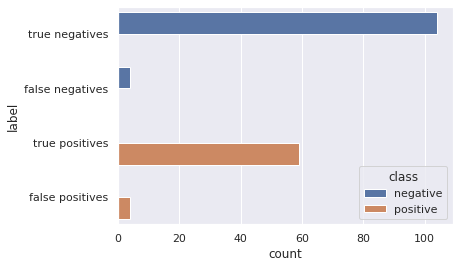

In [ ]:
#we display the True/False positives/negatives in a bar plot :

#frst regroup values by labels
confusion_bars = pd.DataFrame(columns=['class', 'label', 'count'])
confusion_bars = confusion_bars.append({'class':'negative', 'label' : 'true negatives', 'count': cm[0][0]}, ignore_index=True)
confusion_bars = confusion_bars.append({'class':'negative', 'label' : 'false negatives', 'count': cm[0][1]}, ignore_index=True)
confusion_bars = confusion_bars.append({'class':'positive', 'label' : 'true positives', 'count': cm[1][1]}, ignore_index=True)
confusion_bars = confusion_bars.append({'class':'positive', 'label' : 'false positives', 'count': cm[1][0]}, ignore_index=True)

#then plot the bar graph
ax = sns.barplot(x="count", y="label", data=confusion_bars, hue='class')
ax

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(yTest, yPred)
print("Accuracy : "+str(round(acc, 4)*100)+"%")

Accuracy : 95.32000000000001%


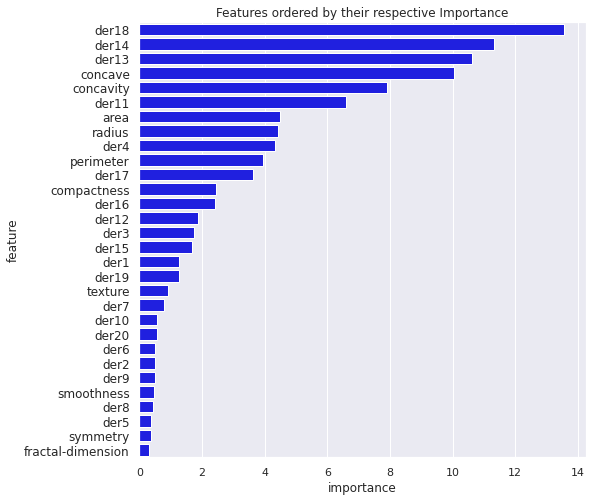

In [ ]:
#we import the feature importances and their respective names into a dataframe
importance_df = pd.DataFrame(x.columns, columns=['feature'])
importance_df["importance"] = clf.feature_importances_
importance_df["importance"] = importance_df.apply(lambda row: row.importance*100, axis=1)
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(8,8))
ax = sns.barplot(x=importance_df['importance'], y=importance_df['feature'], color='blue')
ax.set_title('Features ordered by their respective Importance')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.show()

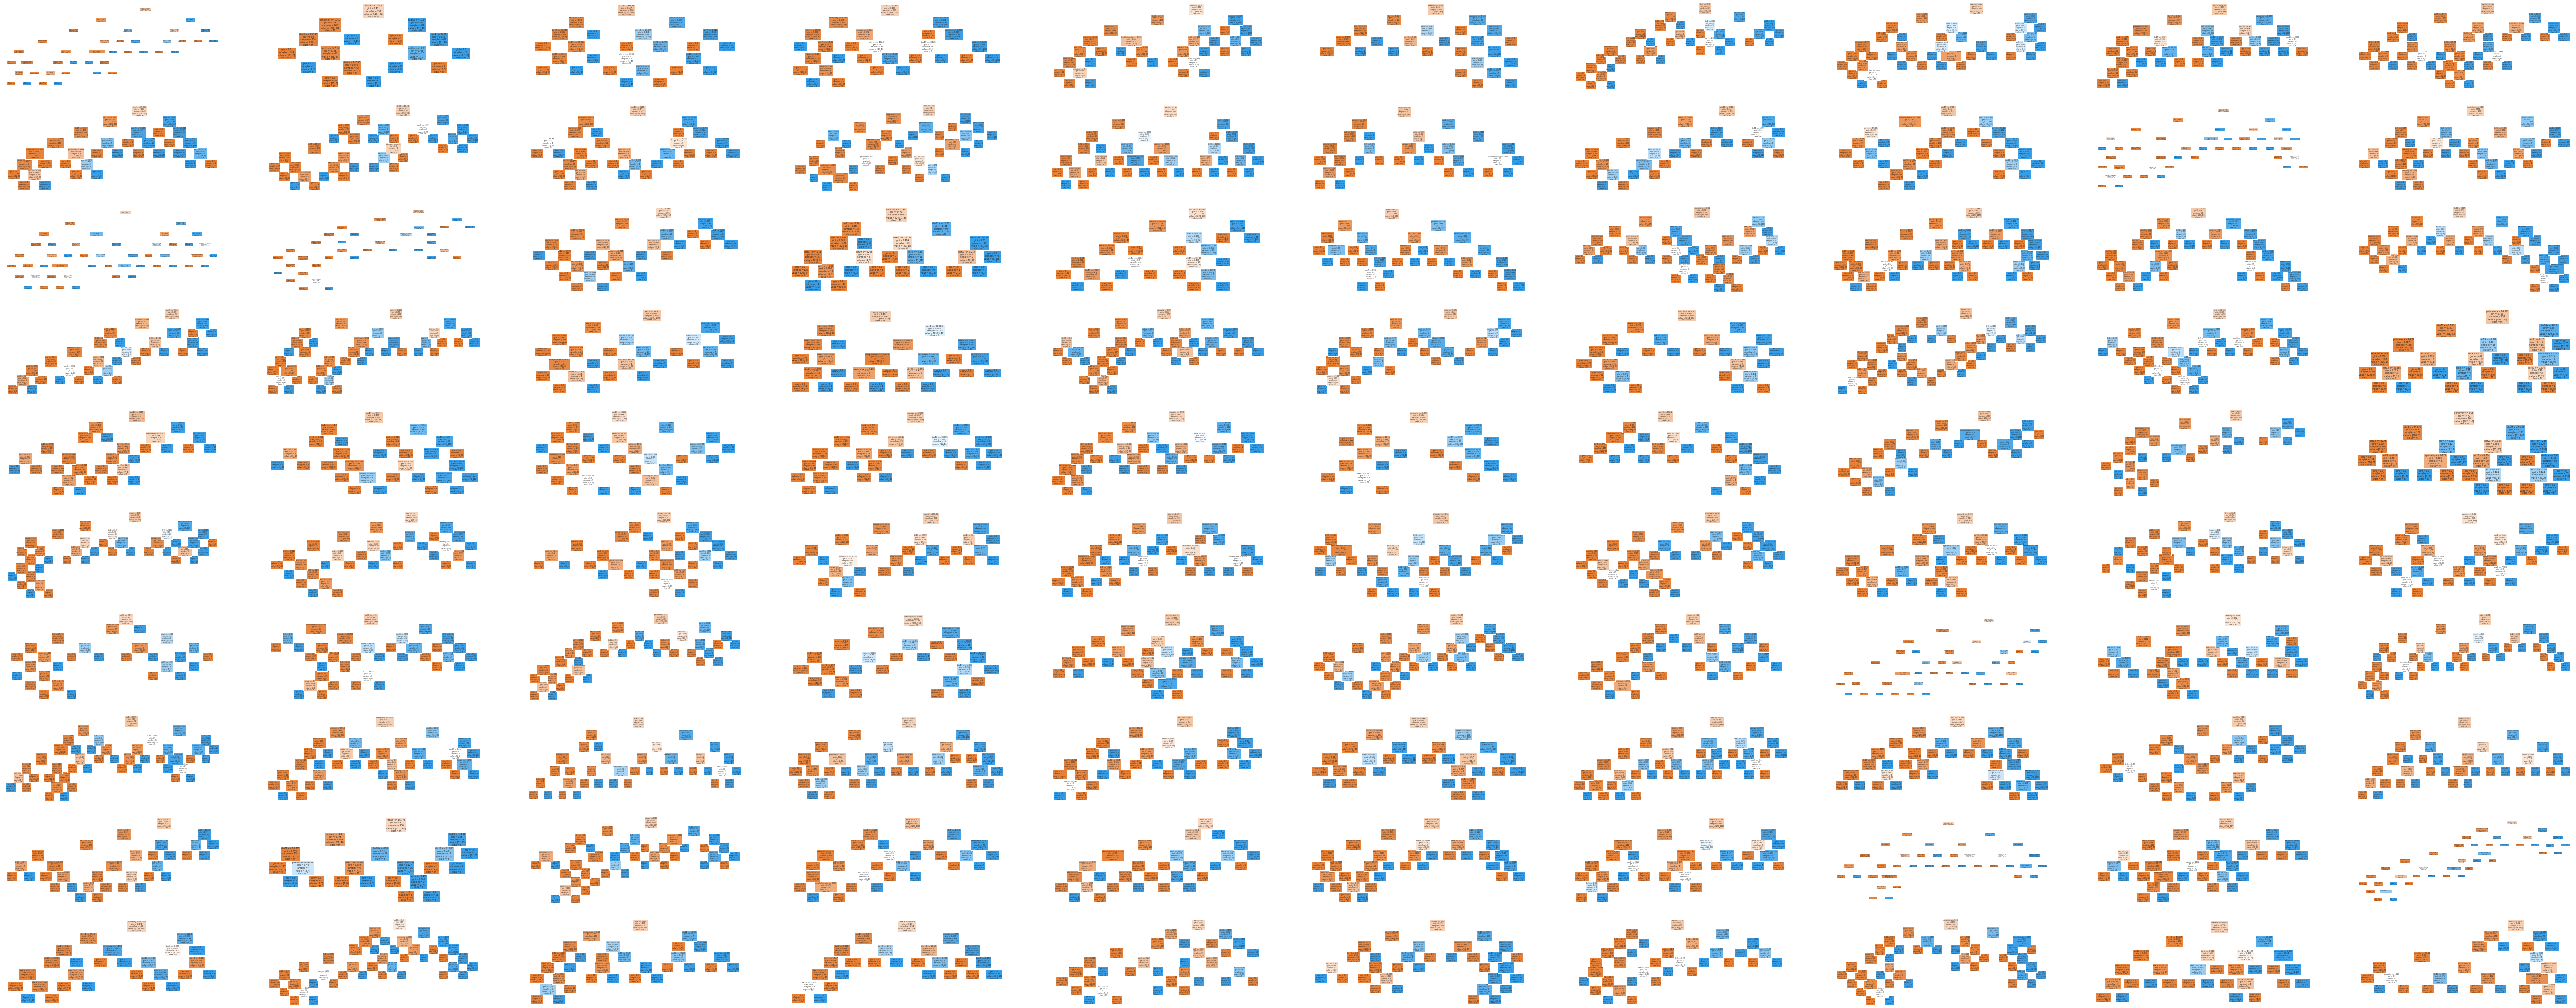

In [ ]:
# # very long and useless visualization but can make a nice wallpaper pic

# from IPython.display import HTML, display
# import time

# def progress(value, max=100):
#     return HTML("""
#         <progress
#             value='{value}'
#             max='{max}',
#             style='width: 100%'
#         >
#             {value}
#         </progress>
#     """.format(value=value, max=max))
# out = display(progress(0, 100), display_id=True)


# from sklearn import tree

# multiplier = 1
# fig, ax = plt.subplots(10, 10, figsize=(100*multiplier, 40*multiplier))

# for i in range(0, 10):
#   for j in range(0, 10):
#     iteration = j+i*10
#     tree_plot = tree.plot_tree(clf.estimators_[iteration],
#                 feature_names = x.columns, 
#                 class_names=["M", "B"],
#                 filled = True,
#                 ax=ax[i, j]);
#     # #display every 10 iterations
#     # if (iteration%10 == 0):
#     #   print(str(iteration)+"%")
#     out.update(progress(iteration+1, 100))
    
# plt.show()

In [ ]:
#we select parameters with an importance factor > 5
importance_df_top_5 = importance_df[importance_df.importance > 5]
importance_df_top_5

,feature,importance
27,der18,13.573170
23,der14,11.336999
22,der13,10.632166
7,concave,10.040652
6,concavity,7.916620
20,der11,6.611202


In [ ]:
#we fit the tree classifier with this new dataset and check accuracy

xTrain2 = xTrain[importance_df_top_5.feature.values]
xTest2 = xTest[importance_df_top_5.feature.values]
clf2 = RandomForestClassifier()
clf2.fit(xTrain2, yTrain)

yPred = clf.predict(xTest)

acc = accuracy_score(yTest, yPred)
print("Accuracy : "+str(round(acc, 4)*100)+"%")

# it is the same.

Accuracy : 95.32000000000001%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
